<a href="https://colab.research.google.com/github/ndb796/machine_learning_for_all/blob/main/introduction_to_machine_learning_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>타이타닉 생존자 예측</b>

* 1912년, 타이타닉호가 빙산과 충돌하여 침몰했습니다.
* 당시에 구명 보트가 충분하지 않아 2,224명의 승객과 승무원 중에서 1,502명이 사망했습니다.
* 이때, 특정한 사람이 가지는 특징(feature)이 <b>생존 여부를 결정하는 요인</b>으로 작용했습니다.
  * <b>[예시]</b> 어린이와 노인의 생존율이 높았습니다.


* GitHub에서 타이타닉(titanic) 데이터 세트를 불러옵니다.

<pre>
!git clone https://github.com/ndb796/machine_learning_for_all
</pre>

In [ ]:
!git clone https://github.com/ndb796/machine_learning_for_all

%cd machine_learning_for_all/datasets/titanic

#### <b>타이타닉 데이터 분석하기</b>

* 데이터의 <b>속성(property)</b>으로는 다음과 같은 것들이 존재합니다.
  * PassengerId: 탑승자 고유 번호
  * Survival: 생존 여부 (생존: 1, 사망 0)
  * Pclass: 객실 등급(1: 1등급, 2: 2등급, 3: 3등급)
  * Name: 이름
  * Sex: 성별
  * Age: 나이
  * Sibsp: 함께 탑승한 형제자매 혹은 배우자의 수
  * Parch: 함께 탑승한 부모 혹은 자식의 수
  * Ticket: 티켓 번호
  * Fare: 티켓 요금
  * Cabin: 객실 번호
  * Embarked: 탑승장(Cherbourg, Queenstown, Southampton)
* 다음과 같은 코드로 <b>학습 데이터</b>를 불러올 수 있습니다.

In [ ]:
import pandas as pd

train_dataset = pd.read_csv("titanic_train.csv")
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* 다음과 같은 코드로 <b>테스트 데이터</b>를 불러올 수 있습니다.

In [ ]:
test_dataset = pd.read_csv("titanic_test.csv")
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


* <b>info() 메서드</b>를 이용하여 데이터를 전체적으로 이해할 수 있습니다.
  * 열(column)의 개수
  * 열(column)의 데이터 타입
  * 존재하지 않는 데이터(NULL)의 개수
  * 데이터의 크기(메모리 크기)
* 데이터 확인 결과 <u>나이(age)와 호실 정보(cabin)에 대한 정보가 많이 유실</u>되었습니다.
* <b>[추측]</b> 나이(age)의 경우, 생존 여부와 상당히 큰 연관성이 있을 것입니다.
  * 그렇다면 나이 정보가 없는 탑승객에 대하여 어떻게 처리할 수 있을까요?


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* head() 메서드를 사용하여 생존자 데이터를 일부 출력합니다.

In [ ]:
train_dataset[train_dataset["Survived"] == 1].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


* head() 메서드를 사용하여 사망자 데이터를 일부 출력합니다.
* 생존자/사망자에 따른 표본 10개씩을 보았을 때, 어떤 정보를 확인할 수 있나요?
  * 여성이 남성보다 상대적으로 많이 생존했습니다.
  * 1등석에 탑승한 사람이, 3등석에 탑승한 사람보다 많이 생존했습니다.

In [ ]:
train_dataset[train_dataset["Survived"] == 0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


* <b>성별에 따른 생존자 수</b>를 출력해 봅시다.
* 여성의 생존자 수가 많은 것을 확인할 수 있습니다.

In [ ]:
survived = train_dataset[train_dataset["Survived"] == 1]["Sex"].value_counts()
print(survived)

female    233
male      109
Name: Sex, dtype: int64


* <b>생존자 통계</b>를 살펴보기 위하여, 함수를 작성할 수 있습니다.


In [ ]:
def show(feature):
    # 특징(feature)에 따른 생존자(survived) 수를 나타내는 컬럼 
    survived = train_dataset[train_dataset["Survived"] == 1][feature].value_counts()
    # 특징(feature)에 따른 사망자(dead) 수를 나타내는 컬럼 
    dead = train_dataset[train_dataset["Survived"] == 0][feature].value_counts()
    # 두 컬럼을 묶어서 데이터프레임(dataframe)으로 생성
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    print(df)
    df.plot(kind="bar", stacked=True)

* 여성이 남성에 비하여 생존율이 높은 것을 확인할 수 있습니다.


          female  male
Survived     233   109
Dead          81   468


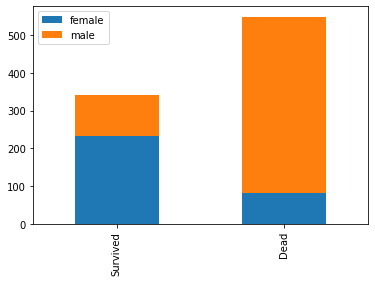

In [ ]:
show("Sex")

* 좌석의 등급이 높을수록, 생존율이 높은 것을 확인할 수 있습니다.

            1   2    3
Survived  136  87  119
Dead       80  97  372


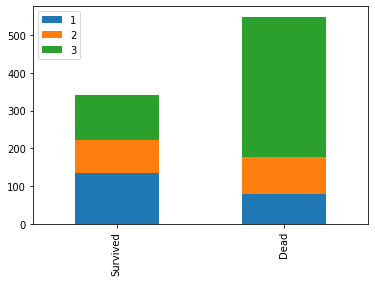

In [ ]:
show("Pclass")

#### <b>캐글(Kaggle)에 제출해보기</b>

* 단순히 성별에 따라서 생존율을 예측할 수 있습니다.
* <b>성별에 따라서 생존/사망 여부를 기입하는 코드</b>는 다음과 같습니다.

In [ ]:
pred = test_dataset["Sex"] == "female"
pred[pred == True] = 1 # 여성인 경우 생존(1)
pred[pred == False] = 0 # 남성인 경우 사망(0)
pred = pred.astype("int32")
print(pred)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int32


* 각 <b>승객 번호(passenger id)에 따른 생존 여부</b>를 기입해야 합니다.
* 문제에서 요구하는 <b>제출 형식(submission format)</b>을 정확히 따를 필요가 있습니다.

In [ ]:
# 제출용 엑셀 파일(.csv) 생성
submission = pd.DataFrame({'PassengerId': test_dataset['PassengerId'], 'Survived': pred})
submission.to_csv('submission.csv', index=False)
print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


#### <b>타이타닉 데이터 세트 특징 공학</b>

* 특징 공학을 위해 기존 타이타닉 데이터 세트를 다시 불러올 수 있습니다.

In [ ]:
import pandas as pd

train_dataset = pd.read_csv("titanic_train.csv")
test_dataset = pd.read_csv("titanic_test.csv")
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* 유용한 정보를 얻기 어려운 특징이라면, 특징 제거를 수행합니다.
  * 티켓의 번호(ticket)
  * 방의 번호(cabin)
  * 이름 정보(name)
* <b>[유의 사항]</b> 이름 데이터에는 사모님(Mrs)과 같은 호칭이 들어가 있습니다.
  * 나이(age) 정보와 연관성이 있지만, 본 과정에서는 편의를 위해 단순 삭제하겠습니다.
  * 참고로 학습(train)과 테스트(test) 데이터 세트 모두에서 불필요한 특징을 제거해야 합니다.
* inplace 속성의 값이 참(true)이면 <u>원본 데이터 프레임의 값이 직접 수정</u>됩니다.

In [ ]:
train_dataset.drop("Ticket", axis=1, inplace=True)
train_dataset.drop("Cabin", axis=1, inplace=True)
train_dataset.drop("Name", axis=1, inplace=True)

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test_dataset.drop("Ticket", axis=1, inplace=True)
test_dataset.drop("Cabin", axis=1, inplace=True)
test_dataset.drop("Name", axis=1, inplace=True)

test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


* 기계가 학습할 수 있도록 하기 위하여, <u>문자열을 수 형태의 데이터로 변환</u>해야 합니다.
* <b>map() 메서드</b>를 이용하면 특정한 값을 다른 특정한 값으로 일괄 변경할 수 있습니다.
* 성별 데이터는 문자열 형태를 보이므로, 이를 <b>수 데이터로 변환</b>합니다.

In [ ]:
m = {"female": 0, "male": 1}
train_dataset["Sex"] = train_dataset["Sex"].map(m)
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [ ]:
test_dataset["Sex"] = test_dataset["Sex"].map(m)
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


* 선착장 데이터는 문자열 형태를 보이므로, 이를 <b>수 데이터로 변환</b>합니다.

In [ ]:
m = {"S": 0, "C": 1, "Q": 2}
train_dataset["Embarked"] = train_dataset["Embarked"].map(m)
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [ ]:
test_dataset["Embarked"] = test_dataset["Embarked"].map(m)
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


* 타이타닉 데이터 세트에는 많은 양의 <b>유실된 값(missing value)</b>이 존재합니다.
* info()를 사용했을 때, 특히 나이(age)에서 많은 양의 결측 값을 확인할 수 있습니다.

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


* 나이(age) 결측 값을 평균 값으로 대체할 수 있습니다.


In [ ]:
train_dataset["Age"].fillna(train_dataset["Age"].mean(), inplace=True)
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [ ]:
test_dataset["Age"].fillna(test_dataset["Age"].mean(), inplace=True)
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


* 요금(fare) 결측 값을 평균 값으로 대체할 수 있습니다.

In [ ]:
train_dataset["Fare"].fillna(train_dataset["Fare"].mean(), inplace=True)
test_dataset["Fare"].fillna(test_dataset["Fare"].mean(), inplace=True)

* 선착장 정보(embarked) 결측 데이터는 학습 데이터 상에서 2개 뿐입니다.
* 따라서 해당 두 명의 정보는 학습에 쓰지 않도록 합니다.


In [ ]:
train_dataset.dropna(inplace=True)

* 결과적으로 모든 학습/테스트 데이터에 결측 값이 존재하지 않게 되었습니다.


In [ ]:
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 69.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-n

* 특정한 컬럼(column)의 <b>요약된 정보</b>를 확인하기 위해 describe() 메서드를 사용할 수 있습니다.
* 학습 데이터의 나이(age) 구간을 확인할 수 있습니다.
  * <b>평균 나이(average age)</b>: 29.65
  * <b>최소 나이(min age)</b>: 0.42
  * <b>최대 나이(max age)</b>: 80.00

In [ ]:
train_dataset["Age"].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

* <b>qcut()</b> 메서드는 데이터의 값에 대하여 구간별로 잘라내어 레이블을 할당합니다.
* <b>나이(age)</b> 속성에 대하여 <b>구간화(binning)</b>를 진행합니다.

In [ ]:
train_dataset["Age"] = pd.qcut(train_dataset["Age"], 4, labels=[0, 1, 2, 3])
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,1,0,7.2500,0.0
1,2,1,1,0,3,1,0,71.2833,1.0
2,3,1,3,0,1,0,0,7.9250,0.0
3,4,1,1,0,2,1,0,53.1000,0.0
4,5,0,3,1,2,0,0,8.0500,0.0


In [ ]:
test_dataset["Age"] = pd.qcut(test_dataset["Age"], 4, labels=[0, 1, 2, 3])
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2,0,0,7.8292,2
1,893,3,0,3,1,0,7.0000,0
2,894,2,1,3,0,0,9.6875,2
3,895,3,1,1,0,0,8.6625,0
4,896,3,0,0,1,1,12.2875,0


In [ ]:
train_dataset["Fare"] = pd.qcut(train_dataset["Fare"], 4, labels=[0, 1, 2, 3])
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,1,0,0,0.0
1,2,1,1,0,3,1,0,3,1.0
2,3,1,3,0,1,0,0,1,0.0
3,4,1,1,0,2,1,0,3,0.0
4,5,0,3,1,2,0,0,1,0.0


In [ ]:
test_dataset["Fare"] = pd.qcut(test_dataset["Fare"], 4, labels=[0, 1, 2, 3])
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2,0,0,0,2
1,893,3,0,3,1,0,0,0
2,894,2,1,3,0,0,1,2
3,895,3,1,1,0,0,1,0
4,896,3,0,0,1,1,1,0


* 결과적으로 데이터 <b>전처리 작업이 모두 완료</b>되었습니다.
* 최종적으로 <u>완성된 데이터를 파일 형태로 내보내기</u> 합니다.



In [ ]:
train_dataset.to_csv("titanic_train_processed.csv", index=False)
test_dataset.to_csv("titanic_test_processed.csv", index=False)

#### <b>타이타닉 모델 학습을 위해 준비하기</b>

* 특징 공학을 수행한 타이타닉 데이터 세트를 불러옵니다.
* 기계 학습 모델은 입력 데이터 x를 받아 출력 데이터 y를 반환합니다.
* 우리의 모델이 <b>7개의 특징</b>만 입력 데이터로 사용하도록 해봅시다.
  * Sex (성별)
  * Age (나이)
  * Pclass (객실 등급)
  * Fare (티켓 요금)
  * Sibsp (형제/배우자 수)
  * Parch (부모/자식 수)
  * Embarked (선착장)

In [ ]:
import pandas as pd

train_dataset = pd.read_csv('titanic_train_processed.csv')
test_dataset = pd.read_csv('titanic_test_processed.csv')

train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,1,0,0,0.0
1,2,1,1,0,3,1,0,3,1.0
2,3,1,3,0,1,0,0,1,0.0
3,4,1,1,0,2,1,0,3,0.0
4,5,0,3,1,2,0,0,1,0.0


In [ ]:
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2,0,0,0,2
1,893,3,0,3,1,0,0,0
2,894,2,1,3,0,0,1,2
3,895,3,1,1,0,0,1,0
4,896,3,0,0,1,1,1,0


* 가장 먼저 탑승객 번호(passenger id)는 입력 특징에서 제외합니다.
  * 따라서 탑승객 번호를 인덱스(index)로 사용할 수 있습니다.
* 생존 여부(survived)는 별도의 정답 레이블로 구분하여 사용합니다.

In [ ]:
label = train_dataset['Survived']
train_dataset.drop("Survived", axis=1, inplace=True)
train_dataset.set_index('PassengerId', inplace=True)
test_dataset.set_index('PassengerId', inplace=True)

train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,0,1,0,0,0.0
2,1,0,3,1,0,3,1.0
3,3,0,1,0,0,1,0.0
4,1,0,2,1,0,3,0.0
5,3,1,2,0,0,1,0.0


In [ ]:
train_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,0,1,0,0,0.0
2,1,0,3,1,0,3,1.0
3,3,0,1,0,0,1,0.0
4,1,0,2,1,0,3,0.0
5,3,1,2,0,0,1,0.0


In [ ]:
print(label)

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64


In [ ]:
test_dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,2,0,0,0,2
893,3,0,3,1,0,0,0
894,2,1,3,0,0,1,2
895,3,1,1,0,0,1,0
896,3,0,0,1,1,1,0


#### <b>모델 학습 및 제출하여 결과 확인하기</b>

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score) * 100, 2)))

[0.80337079 0.79775281 0.75280899 0.74157303 0.83615819]
점수 평균 : 78.63


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1234)
scoring = 'accuracy'
score = cross_val_score(clf, train_dataset, label, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(round(np.mean(score) * 100, 2)))

[0.80337079 0.80337079 0.79775281 0.75842697 0.82485876]
점수 평균 : 79.76


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1234)
clf.fit(train_dataset, label)
prediction = clf.predict(test_dataset)
pred = pd.DataFrame({"PassengerId" : test_dataset.index, "Survived" : prediction})
pred.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:
pred.to_csv('my_submission.csv', index=False)